In [1]:
import nltk
from nltk.corpus import stopwords
import json


#https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24


In [3]:
with open('allpoems.json', 'r') as fp:
    allpoems = json.load(fp)

In [25]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from scipy import sparse, io
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary


stemmer= PorterStemmer()
lemmatizer=WordNetLemmatizer()

from gensim.corpora import Dictionary

In [5]:
word_list = []
word_list2 = []

In [11]:
#word_list2 = []
word_list = []
counter = 0
allpoems_new = []
wordlist2 = []

for poems in allpoems:
    
    
    
    allpoems[counter]['word_list'] = []
    #poems['text_clean'] = []
    for key,value in poems.items():
        
        if key == 'text':
            
            text_lc = value.lower()#lowercase
            text_rn = result = re.sub(r'\d+', '', text_lc) #remove numbers
            text_punct = text_rn.translate(str.maketrans('', '', string.punctuation))#remove punctuation
            text_ws = text_punct.strip()#remove whitespace
            tokens = word_tokenize(text_ws)

            
            stop_words = set(stopwords.words('english'))
            #result = [i for i in tokens if len(i) > 3 and not i in stop_words]
            result = [i for i in tokens if i not in gensim.parsing.preprocessing.STOPWORDS and len(i) > 3]
            word_list = []
            for word in result:
                stem_word = stemmer.stem(word)
                lemm_word = lemmatizer.lemmatize(stem_word)
                #print(lemm_word)
                word_list.append(lemm_word)
            ##bigram = gensim.models.Phrases(word_list, min_count=5, threshold=100) # higher threshold fewer phrases.
            ##trigram = gensim.models.Phrases(bigram[word_list], threshold=100)  
##
            ### Faster way to get a sentence clubbed as a trigram/bigram
            ##bigram_mod = gensim.models.phrases.Phraser(bigram)
            ##trigram_mod = gensim.models.phrases.Phraser(trigram)
            ##print(trigram_mod[bigram_mod[word_list[0]]])
            #bow_corpus = [dct.doc2bow(doc) for doc in word_list]
            #print('type wordlist:', type(word_list))
            #print(type(word_list[0]))
            allpoems[counter]['word_list'] = word_list
            #print(allpoems[counter])
                
    word_list2.append(word_list)
    #word_list2.append(word_list)
    #allpoems_new.append(poems)
    #print(word_list)
    counter += 1
    if counter == 54770:
        break
    

#https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908
    

In [12]:
dct = Dictionary(word_list2)
print(dct)

Dictionary(161283 unique tokens: ['appli', 'approach', 'aw', 'awak', 'canst']...)


In [13]:
bow_corpus = [dct.doc2bow(doc) for doc in word_list2]
print(bow_corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
#############################################

lda_model1 =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 20, #100
                                   id2word = dct,                                    
                                   passes = 1,#20
                                   workers = 2)


In [28]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
#import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

In [17]:
# Compute Perplexity
print('\nPerplexity: ', lda_model1.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model1, texts=word_list2, dictionary=dct, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.70238488161

Coherence Score:  0.42688276276


In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

ValueError: x and y must have same first dimension, but have shapes (7,) and (10,)

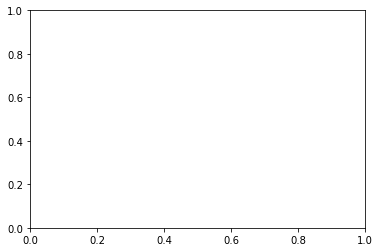

In [33]:
model_list, coherence_values = compute_coherence_values(dictionary=dct, corpus=bow_corpus, texts=word_list2, start=40, limit=100, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

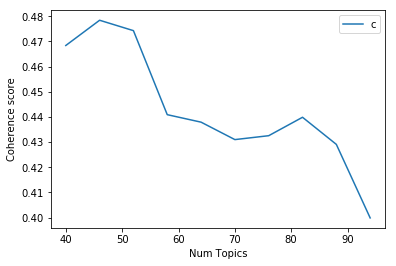

In [34]:
limit=100; start=40; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model1, bow_corpus, dct)
vis
# eerste keer: 20 topics en 1000 poems, perplexity: -8.7, coherence .34
# 20 topics en 10.000 poems: perlexity: -9.16, coherence .32
# 20 topics, 10.000 poems, gecleand met (no_below=15, no_above=0.5, keep_n=100000): perlexity: -8.1, coherence: .31
# 20 topics, hele dataset: perplexity = -9.7, coherence: .43

C:\Users\prouwendaal\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.151004  0.035903       1        1  20.113792
18     0.050157 -0.087679       2        1  19.073694
10     0.048222 -0.119060       3        1  10.643293
7      0.127656 -0.030840       4        1   8.938100
5      0.054469  0.105796       5        1   5.546301
15     0.060409  0.007156       6        1   5.439752
16     0.084044 -0.039822       7        1   4.276259
9     -0.124373 -0.030129       8        1   3.918401
12    -0.136338  0.031327       9        1   3.492342
11     0.010198  0.068039      10        1   2.956658
1      0.000814  0.073134      11        1   2.672673
13    -0.060274  0.016271      12        1   2.296983
3     -0.074767  0.000737      13        1   1.824363
2      0.016045  0.062361      14        1   1.707889
6      0.051567 -0.039254      15        1   1.538832
19     0.082917 -0.020089      16        1   1.468646
17    -0.007492  0.031808      17        1   1.336584
0     -0.132257 -0.035987      18        1   1.122216
14    -0.048800  0.002252      19        1   0.848228
4     -0.153199 -0.031924      20        1   0.785000, topic_info=      Category          Freq       Term         Total  loglift  logprob
term                                                                   
36236  Default   8222.000000         fo   8222.000000  30.0000  30.0000
20     Default  37356.000000       love  37356.000000  29.0000  29.0000
1243   Default   7203.000000  copyright   7203.000000  28.0000  28.0000
13359  Default   5152.000000  methodist   5152.000000  27.0000  27.0000
5694   Default   7230.000000    raymond   7230.000000  26.0000  26.0000
123    Default  47763.000000       like  47763.000000  25.0000  25.0000
19888  Default   6666.000000    contact   6666.000000  24.0000  24.0000
481    Default  22413.000000       come  22413.000000  23.0000  23.0000
254    Default  18546.000000       live  18546.000000  22.0000  22.0000
6372   Default   6584.000000       unit   6584.000000  21.0000  21.0000
3866   Default   7374.000000     church   7374.000000  20.0000  20.0000
2491   Default   6407.000000    worship   6407.000000  19.0000  19.0000
187    Default  16515.000000      world  16515.000000  18.0000  18.0000
4056   Default   5970.000000       usag   5970.000000  17.0000  17.0000
989    Default  20757.000000       time  20757.000000  16.0000  16.0000
388    Default  21503.000000       know  21503.000000  15.0000  15.0000
186    Default  13804.000000       word  13804.000000  14.0000  14.0000
1361   Default  14477.000000       said  14477.000000  13.0000  13.0000
514    Default  18314.000000       life  18314.000000  12.0000  12.0000
418    Default  11135.000000      right  11135.000000  11.0000  11.0000
43     Default  13921.000000       thou  13921.000000  10.0000  10.0000
1246   Default   6469.000000       poem   6469.000000   9.0000   9.0000
1905   Default   7458.000000       lord   7458.000000   8.0000   8.0000
4785   Default   4445.000000     reserv   4445.000000   7.0000   7.0000
671    Default  12195.000000      littl  12195.000000   6.0000   6.0000
1407   Default  11003.000000       want  11003.000000   5.0000   5.0000
8425   Default   4080.000000     sermon   4080.000000   4.0000   4.0000
205    Default  13541.000000      shall  13541.000000   3.0000   3.0000
1337   Default  10820.000000       walk  10820.000000   2.0000   2.0000
1312   Default   5950.000000       read   5950.000000   1.0000   1.0000
...        ...           ...        ...           ...      ...      ...
1810   Topic20    197.957947       hymn   1109.736084   3.1234  -5.3386
2491   Topic20    544.934326    worship   6407.210938   2.3827  -4.3260
51996  Topic20     65.604668       blog    293.299103   3.3497  -6.4430
6372   Topic20    475.495361       unit   6584.968750   2.2191  -4.4623
4839   Topic20    324.084442     sunday   4123.697754   2.3037  -4.8456
7401   Topic20    252.409637     

In [ ]:
# Mallet env variable and path for Windows 10 in B:/ drive
import os
os.environ.update({'MALLET_HOME': r'C:/Users/prouwendaal/Desktop/IR/mallet-2.0.8/'})
mallet_path = 'C:/Users/prouwendaal/Desktop/IR/mallet-2.0.8/bin/mallet'

## Mallet env variable and path for Ubuntu 18.04
#import os
#os.environ.update({'MALLET_HOME': r'/home/your_username/any_directory/mallet/'})
#mallet_path = '/home/your_username/any_directory/mallet/bin/mallet'
#
#2  
#•Reply•Share ›



# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
#mallet_path = 'C:/Users/prouwendaal/Desktop/IR/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=bow_corpus, num_topics=20, id2word=dct)


## Show Topics
#pprint(ldamallet.show_topics(formatted=False))
#
## Compute Coherence Score
#coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=word_list2, dictionary=dct, coherence='c_v')
#coherence_ldamallet = coherence_model_ldamallet.get_coherence()
#print('/nCoherence Score: ', coherence_ldamallet)

In [35]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=6):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=bow_corpus, num_topics=num_topics, id2word=dct)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=word_list2, dictionary=dct, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [37]:
import os
os.environ.update({'MALLET_HOME': r'C:/Users/prouwendaal/Desktop/IR/mallet-2.0.8/'})
mallet_path = 'C:/Users/prouwendaal/Desktop/IR/mallet-2.0.8/bin/mallet'

model_list, coherence_values = compute_coherence_values(dictionary=dct, corpus=bow_corpus, texts=word_list2, start=2, limit=40, step=6)

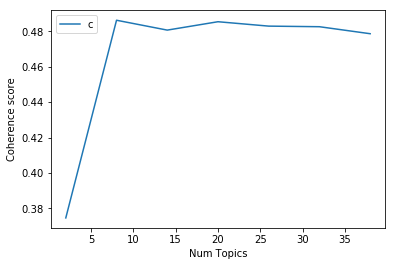

In [38]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.3746
Num Topics = 8  has Coherence Value of 0.4863
Num Topics = 14  has Coherence Value of 0.4807
Num Topics = 20  has Coherence Value of 0.4854
Num Topics = 26  has Coherence Value of 0.4829
Num Topics = 32  has Coherence Value of 0.4826
Num Topics = 38  has Coherence Value of 0.4787


In [45]:
import gensim    
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(model_list[1])

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, bow_corpus, dct)
vis
# eerste keer: 20 topics en 1000 poems, perplexity: -8.7, coherence .34
# 20 topics en 10.000 poems: perplexity: -9.16, coherence .32
# 20 topics, 10.000 poems, gecleand met (no_below=15, no_above=0.5, keep_n=100000): perlexity: -8.1, coherence: .31
# 30 topics, 10.000 poems: perplexity: -9.7, coherence: .32
# 5 topics, 10.000 poems: perplexity: -8.8, coherence: .32
# 8 topics, 10.000 poems: perplexity: -9.0 ,coherence: .30
# 15 topics, 10.000 poems: perplexity: -9.2 ,coherence: .31

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.099080  0.213502       1        1  16.164488
7      0.077325  0.171978       2        1  13.198227
1      0.248598 -0.269699       3        1  12.645368
5      0.212766  0.061193       4        1  12.434705
3     -0.164040 -0.120456       5        1  12.412099
4      0.139193  0.014204       6        1  12.056231
2     -0.110498  0.096135       7        1  10.664650
0     -0.304264 -0.166857       8        1  10.424232, topic_info=      Category          Freq                  Term         Total  loglift  \
term                                                                        
20     Default  39311.000000                  love  39311.000000  30.0000   
72848  Default  11494.000000               suncook  11494.000000  29.0000   
43     Default  14789.000000                  thou  14789.000000  28.0000   
112    Default  19077.000000                 heart  19077.000000  27.0000   
36236  Default   9733.000000                    fo   9733.000000  26.0000   
3866   Default   9476.000000                church   9476.000000  25.0000   
989    Default  21636.000000                  time  21636.000000  24.0000   
356    Default  14793.000000                   eye  14793.000000  23.0000   
6372   Default   8630.000000                  unit   8630.000000  22.0000   
254    Default  19739.000000                  live  19739.000000  21.0000   
170    Default   9383.000000                  tree   9383.000000  20.0000   
550    Default  11214.000000                  thee  11214.000000  19.0000   
193    Default  11960.000000                 child  11960.000000  18.0000   
311    Default  11062.000000                 water  11062.000000  17.0000   
13359  Default   7856.000000             methodist   7856.000000  16.0000   
2491   Default   7761.000000               worship   7761.000000  15.0000   
251    Default  17799.000000                 light  17799.000000  14.0000   
987    Default  15651.000000                 thing  15651.000000  13.0000   
182    Default   9610.000000                  wind   9610.000000  12.0000   
514    Default  19451.000000                  life  19451.000000  11.0000   
671    Default  13920.000000                 littl  13920.000000  10.0000   
1082   Default   8402.000000                father   8402.000000   9.0000   
1243   Default   6482.000000             copyright   6482.000000   8.0000   
3865   Default   6412.000000                christ   6412.000000   7.0000   
609    Default   9276.000000                 dream   9276.000000   6.0000   
5694   Default   6276.000000               raymond   6276.000000   5.0000   
1926   Default   6333.000000                prayer   6333.000000   4.0000   
19888  Default   6136.000000               contact   6136.000000   3.0000   
186    Default  15264.000000                  word  15264.000000   2.0000   
4056   Default   6036.000000                  usag   6036.000000   1.0000   
...        ...           ...                   ...           ...      ...   
8425    Topic8   6013.475270                sermon   6013.475270   2.2610   
4839    Topic8   5125.659039                sunday   5125.659039   2.2610   
73085   Topic8   4944.149943  httpwwwsuncookumcorg   4944.149943   2.2610   
20493   Topic8   4838.598458               matthew   4838.598458   2.2610   
4418    Topic8   4768.559622                  john   4768.559622   2.2610   
4967    Topic8   4691.615549                 psalm   4691.615549   2.2610   
29292   Topic8   4617.630863                  luke   4617.630863   2.2610   
4785    Topic8   4058.306637                reserv   4058.306637   2.2610   
7401    Topic8   3932.039440                pastor   3932.039440   2.2610   
2722    Topic8   3785.056531                 theme   3785.056531   2.2610   
20177   Topic8   3717.977082                  ruth   3717.977082   2.2610   
10356   Topic8   3447.686363 

In [48]:
pprint(model_list[1].show_topics(formatted=False))

[(0,
  [('suncook', 0.021002314364198731),
   ('fo', 0.017784915536521534),
   ('church', 0.017316274810921493),
   ('unit', 0.015767957952112128),
   ('methodist', 0.014354825917995083),
   ('worship', 0.014181789342388914),
   ('live', 0.01251811476650877),
   ('copyright', 0.011843993107376405),
   ('christ', 0.011717820604330241),
   ('raymond', 0.011469080526896373)]),
 (1,
  [('hand', 0.0079708280246781858),
   ('black', 0.0075158004405922263),
   ('bodi', 0.0070356678863497998),
   ('window', 0.0064551154514815067),
   ('open', 0.0060926624448475186),
   ('room', 0.0058729939559784344),
   ('insid', 0.0057051044680570635),
   ('hous', 0.0056125298906050929),
   ('white', 0.0055576127683878212),
   ('street', 0.0051386735789017831)]),
 (2,
  [('love', 0.054407367441247453),
   ('child', 0.016616693712468801),
   ('life', 0.015578793894513134),
   ('thing', 0.015354327465629865),
   ('live', 0.01460679247769751),
   ('time', 0.013632731735846259),
   ('heart', 0.01348034168320991)

In [50]:
def format_topics_sentences(ldamodel=model_list[1], corpus=bow_corpus, texts=word_list2):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[1], corpus=bow_corpus, texts=word_list2)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show


In [157]:
df = df_dominant_topic
df.loc[df['Dominant_Topic'] == 3.0].sort_values(by=['Topic_Perc_Contrib'],ascending = False)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
38938,38938,3.0,0.7059,"time, feel, thing, peopl, word, write, world, ...","[imprison, boom, develop, builtin, growth, dyn..."
39804,39804,3.0,0.6968,"time, feel, thing, peopl, word, write, world, ...","[eat, food, mcdonald, mathemat, imposs, order,..."
43296,43296,3.0,0.6967,"time, feel, thing, peopl, word, write, world, ...","[figur, femal, male, contain, figur, mythic, h..."
40627,40627,3.0,0.6867,"time, feel, thing, peopl, word, write, world, ...","[write, write, novel, call, young, woman, offi..."
37019,37019,3.0,0.6851,"time, feel, thing, peopl, word, write, world, ...","[take, advantag, relationship, interact, actua..."
39779,39779,3.0,0.6833,"time, feel, thing, peopl, word, write, world, ...","[certain, long, live, tri, certain, wrong, com..."
10421,10421,3.0,0.6784,"time, feel, thing, peopl, word, write, world, ...","[feel, small, reluct, ventur, public, work, ch..."
42070,42070,3.0,0.6576,"time, feel, thing, peopl, word, write, world, ...","[place, terrain, govern, chang, unstabl, langu..."
39413,39413,3.0,0.6451,"time, feel, thing, peopl, word, write, world, ...","[lot, time, lot, car, lot, money, love, cold, ..."
41661,41661,3.0,0.6210,"time, feel, thing, peopl, word, write, world, ...","[plume, felt, father, pas, immedi, rais, hackl..."


In [158]:
allpoems_final[38938]

{'url': 'https://www.poetryfoundation.org/poems/48197/louisiana-purchase',
 'title': 'Louisiana Purchase',
 'author': 'Charlie Smith',
 'text': 'Who knows but that Meriwether Lewis’s lost diaries might turn up yet packed in a can in some cramped ex-midden dug up a thousand years from now, that elegant, exfoliate style continue on up the Missouri, into sadness and disrepute, the suicide in a hotel in Tennessee no more important now than the bundle of grasses my friend made out in the woods yesterday and gave to me after a meeting in which she confessed she’s afraid of everything that’s coming. The past I don’t mind, she said, and laughed as if that was something.',
 'topic': 'Time'}

In [110]:
#print(len(allpoems[0]))
#print(allpoems[0])
#print(df['Dominant_Topic'][0])
#print(df.head(5))



counter = 0
for item in allpoems_final:
    #print (allpoems_final[counter])
    if df['Dominant_Topic'][counter] == 0.0:
        topic = 'Christianity'
    if df['Dominant_Topic'][counter] == 1.0:
        topic = 'City'
    if df['Dominant_Topic'][counter] == 2.0:
        topic = 'Love'
    if df['Dominant_Topic'][counter] == 3.0:
        topic = 'Time'
    if df['Dominant_Topic'][counter] == 4.0:
        topic = 'Traveling'
    if df['Dominant_Topic'][counter] == 5.0:
        topic = 'Nature'
    if df['Dominant_Topic'][counter] == 6.0:
        topic = 'Classical'
    if df['Dominant_Topic'][counter] == 7.0:
        topic = 'Night'
#    if df['Dominant_Topic'][counter] == 8.0:
#        topic = 'seasons'
#    if df['Dominant_Topic'][counter] == 9.0:
#        topic = 'night'
#    if df['Dominant_Topic'][counter] == 10.0:
#        topic = 'childhood'
#    if df['Dominant_Topic'][counter] == 11.0:
#        topic = 'the elements'
#    if df['Dominant_Topic'][counter] == 12.0:
#        topic = 'love'
#    if df['Dominant_Topic'][counter] == 13.0:
#        topic = 'death'
#    if df['Dominant_Topic'][counter] == 14.0:
#        topic = 'house'
#    if df['Dominant_Topic'][counter] == 15.0:
#        topic = 'classic'
#    if df['Dominant_Topic'][counter] == 16.0:
#        topic = 'hair'
#    if df['Dominant_Topic'][counter] == 17.0:
#        topic = 'life'
#    if df['Dominant_Topic'][counter] == 18.0:
#        topic = 'kingdom'
#    if df['Dominant_Topic'][counter] == 19.0:
#        topic = 'traveling'
#
    allpoems_final[counter]['topic'] = topic
    counter += 1
    if counter == 54770:
        break

In [81]:
allpoems_final[49699]
counter = 0
for poem in allpoems_final:
    del allpoems_final[counter]['word_list']
    counter +=1
    if counter == 54770:
        break

KeyError: 'word_list'

In [140]:
allpoems_final[16]

{'url': 'http://famouspoetsandpoems.com/poets/adrian_green/poems/21848',
 'title': 'Luna Lake Haiku',
 'author': 'Adrian Green',
 'text': 'New moon on the lake.\r\nYour voice and the nightingale \r\nserenade springtime. \r\nFull moon on the lake. \r\nYour voice and the waterbirds \r\ncelebrate summer. \r\nOld moon on the lake. \r\nOwls hunting autumnal food -\r\nyour voice still singing. ',
 'topic': 'Nature'}

In [111]:
with open('topics_final.json', 'w') as outfile:
    json.dump(allpoems_final, outfile)

In [103]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
print(topic_counts)#.sort_values(by=['Dominant_Topic'],ascending = True))
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
print(topic_contribution)
# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

## Concatenate Column wise
#df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
#
## Change Column names
#df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
#
## Show
#df_dominant_topics

1.0    10698
0.0    10325
5.0     7919
3.0     7502
6.0     6528
7.0     5245
4.0     4323
2.0     2494
Name: Dominant_Topic, dtype: int64
1.0    0.1944
0.0    0.1876
5.0    0.1439
3.0    0.1363
6.0    0.1186
7.0    0.0953
4.0    0.0786
2.0    0.0453
Name: Dominant_Topic, dtype: float64


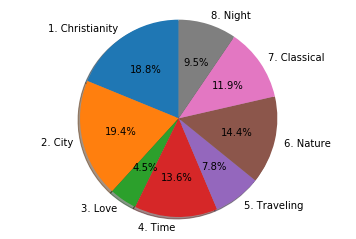

In [149]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1. Christianity', '2. City', '3. Love', '4. Time', '5. Traveling', '6. Nature', '7. Classical', '8. Night'  
sizes = [18.8, 19.4, 4.5, 13.6, 7.8, 14.4, 11.9,9.5]
explode = (0,0,0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [148]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Document_No"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Document_No
0,0.0,0.8521,"suncook, fo, church, unit, methodist, worship,...","[flesh, christ, word, fulfil, fulfil, love, co..."
1,1.0,0.6207,"hand, black, bodi, window, open, room, insid, ...","[song, feel, like, someth, chang, play, shot, ..."
2,2.0,0.9601,"love, child, life, thing, live, time, heart, f...","[incipit, prohemium, secundi, libri, blake, wa..."
3,3.0,0.7059,"time, feel, thing, peopl, word, write, world, ...","[imprison, boom, develop, builtin, growth, dyn..."
4,4.0,0.7645,"littl, home, play, year, head, dead, town, don...","[dosnt, thou, er, leg, canter, awaäi, proputti..."
5,5.0,0.6038,"water, tree, wind, light, green, leav, bird, f...","[snowwhit, snowwhit, ladi, clear, queen, weste..."
6,6.0,0.8287,"thou, thee, fair, heaven, great, soul, natur, ...","[night, dreadless, angel, unpursud, heavn, wid..."
7,7.0,0.5938,"eye, heart, night, dream, light, death, hand, ...","[tonight, tread, unsubstanti, loom, thunder, n..."
